# Machine Learning Basics

## 確認 tesnsorflow 的安裝

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 啟動 eager execution 模式
tf.executing_eagerly = True

# 這個最好也要執行，不然 No algorithm worked.......

print('Tensorflow Version: ' + tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# def set_tensorflow_config(per_process_gpu_memory_fraction=0.8):
#     config = tf.compat.v1.ConfigProto()
#     # config = tf.ConfigProto()
#     config.gpu_options.per_process_gpu_memory_fraction = per_process_gpu_memory_fraction
#     config.gpu_options.allow_growth=True
#     # sess = tf.Session(config=config)
#     sess = tf.compat.v1.Session(config=config)
    
#     print("== TensorFlow Config options set ==")
#     print("\nThis process will now utilize {} GPU Memeory Fraction".format(per_process_gpu_memory_fraction))

# set_tensorflow_config()


Tensorflow Version: 2.4.0
Num GPUs Available:  1


In [3]:


from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

c:\users\clin8\myapp\python\ai\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [2]:
# 測試 CPU 和 GPU 速度差異

import timeit

n = 100000000

with tf.device('/cpu:0'):
    cpu_a = tf.random.normal([1,n])
    cpu_b = tf.random.normal([n,1])
#     print(cpu_a.device, cpu_b.device)
    
with tf.device('/gpu:0'):
    gpu_a = tf.random.normal([1,n])
    gpu_b = tf.random.normal([n,1])
#     print(gpu_a.device, gpu_b.device)
    
def cpu_run():
    with tf.device('/cpu:0'):
        return tf.matmul(cpu_a, cpu_b)
    
def gpu_run():
    with tf.device('/gpu:0'):
        return tf.matmul(gpu_a, gpu_b)
    
n_list = [1000,10000,100000,1000000,10000000,100000000]
result_cpu = []
result_gpu = []
nums = []

for n in n_list:
    with tf.device('/cpu:0'):
        cpu_a = tf.random.normal([1,n])
        cpu_b = tf.random.normal([n,1])
#     print(cpu_a.device, cpu_b.device)
    
    with tf.device('/gpu:0'):
        gpu_a = tf.random.normal([1,n])
        gpu_b = tf.random.normal([n,1])
#     print(gpu_a.device, gpu_b.device)

    cpu_time = timeit.timeit(cpu_run, number= 20)
    gpu_time = timeit.timeit(gpu_run, number= 20)
    nums.append(n)
    result_cpu.append(cpu_time)
    result_gpu.append(gpu_time)
    print('When n = %d, runtime of CPU: %.4f, GPU %.4f' %(n, cpu_time, gpu_time))


When n = 1000, runtime of CPU: 0.0036, GPU 1.2898
When n = 10000, runtime of CPU: 0.0008, GPU 0.0013
When n = 100000, runtime of CPU: 0.0021, GPU 0.0013
When n = 1000000, runtime of CPU: 0.0388, GPU 0.0027
When n = 10000000, runtime of CPU: 0.1619, GPU 0.0069
When n = 100000000, runtime of CPU: 1.5930, GPU 0.0015


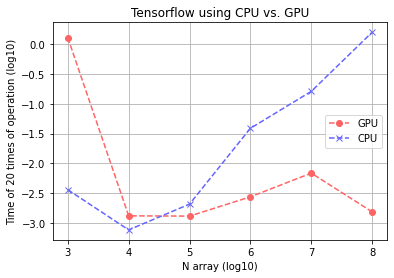

In [3]:
lineA = plt.plot(np.log10(nums), np.log10(result_gpu), color=(255/255,100/255,100/255), label='GPU')
lineB = plt.plot(np.log10(nums), np.log10(result_cpu), color=(100/255,100/255,255/255), label='CPU')
# lines = plt.plot(nums, result_gpu,nums, result_cpu)
plt.setp(lineA, marker = 'o', linestyle = '--')
plt.setp(lineB, marker = 'x', linestyle = '--')

plt.title('Tensorflow using CPU vs. GPU')
plt.xlabel('N array (log10)')
plt.ylabel('Time of 20 times of operation (log10)')
plt.grid(True)
plt.legend()
plt.show()

## TensorFlow Basics

### Tensors

In [4]:
a = 1.2
aa = tf.constant(1.2)
type(a), type(aa), tf.is_tensor(aa)

(float, tensorflow.python.framework.ops.EagerTensor, True)

In [5]:
x = tf.constant([1.,2.,3.3])
x

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1. , 2. , 3.3], dtype=float32)>

In [6]:
# 轉回 numpy
x.numpy()

array([1. , 2. , 3.3], dtype=float32)

In [7]:
x = tf.constant([[[1,2],[3,4]],[[5,6],[7,8]]])
x.shape

TensorShape([2, 2, 2])

In [8]:
s = tf.constant('Hello world!')
tf.strings.lower(s)

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world!'>

In [9]:
b = tf.constant(True)
# b is True
b == True

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [10]:
# 精度 int16, int32, int64, float16, float32, float64, ...
a = tf.constant(123456789, dtype=tf.int16)
# a = tf.constant(123456789, dtype=tf.int32)

In [11]:
# 轉換精度
if a.dtype != tf.int32:
    a = tf.cast(a, tf.int32)
    
a

<tf.Tensor: shape=(), dtype=int32, numpy=-13035>

In [12]:
# 轉換 from numpy.array or list

a = [[1,2,3],[2,3,4],[3,4,5]]
numpy_a = np.array(a)
tf_a = tf.convert_to_tensor(a)
tf_a

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])>

In [13]:
# 這個很酷，建立全 0 or 全 1 的張量，不用指定形狀，當然，也可以指定

z = tf.zeros([])
o = tf.ones([])
z33 = tf.ones([3,3])
z33

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [14]:
# 通過 like 可以建立形狀一樣的 0 / 1 張量
print(tf_a)

z_a = tf.zeros_like(tf_a)
print(z_a)

tf.Tensor(
[[1 2 3]
 [2 3 4]
 [3 4 5]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[0 0 0]
 [0 0 0]
 [0 0 0]], shape=(3, 3), dtype=int32)


In [15]:
# 創建自訂數值的張量，形狀可以由 shape 參數指定

tf_any = tf.fill([], -1)
tf_any = tf.fill([3,2], 99.)
print(tf_any)

tf.Tensor(
[[99. 99.]
 [99. 99.]
 [99. 99.]], shape=(3, 2), dtype=float32)


In [16]:
# 創建一個分布

tf_norm_dist = tf.random.normal([5,5], mean = 1., stddev = 0.2)
print(tf_norm_dist)

tf.Tensor(
[[1.2914581  0.94345856 1.1650009  1.1644319  0.9062506 ]
 [1.1350812  1.065728   1.2576395  0.61384606 1.3608384 ]
 [1.0460066  1.2998005  0.60839736 1.4730248  0.8806385 ]
 [0.8748949  0.91007787 0.9422079  1.1858557  0.9411287 ]
 [1.1808281  1.0326407  0.8728918  0.9970316  0.84486616]], shape=(5, 5), dtype=float32)


In [19]:
# 通过 tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32)可以创建采样自 [minval, maxval)区间的均匀分布的张量

tf_unif_dist = tf.random.uniform([5,3], minval=-1., maxval=1.)
print(tf_unif_dist)

tf.Tensor(
[[ 0.03256083  0.48465872 -0.67621994]
 [-0.01809406  0.6386244   0.98438525]
 [-0.1460216   0.2891419   0.7385464 ]
 [ 0.71153164 -0.87572265  0.15578151]
 [-0.78932095  0.3983035  -0.58076835]], shape=(5, 3), dtype=float32)


In [18]:
# 通过 tf.range()函数实现。tf.range(limit, delta=1)可以创建[0, limit)之间，步长为 delta 的整型序列，不包含 limit 本身。例如，创建 0~10，步长为 1 的整型序列

tf_range = tf.range(start=1, limit=10, delta=0.5)
print(tf_range)

tf.Tensor([1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.  9.5], shape=(18,), dtype=float32)


**Summary**

> 矩阵 - 也是非常常见的张量类型，比如全连接层的批量输入张量𝑿的形状为 [𝑏, 𝑑in]，其 中𝑏表示输入样本的个数，即Batch Size，𝑑in表示输入特征的长度。例如特征长度为 4，一
共包含 2 个样本的输入可以表示为矩阵

> 三维张量 - 𝑿 = [𝑏, sequence len, feature len] 𝑏表示序列信号的数量，sequence len 表示序列信号在时间维度上的采样点数或步数， feature len 表示每个点的特征长度

> 四维张量 - 𝑿 = [𝑏, ℎ, w , 𝑐] 𝑏表示输入样本的数量，ℎ/ 分别表示特征图的高/宽，𝑐表示特征图的通道数，部分深 度学习框架也会使用[𝑏, 𝑐, ℎ, w ]格式的特征图张量，每张图片包含了ℎ行 列像素点，每个点需要 3 个数值表示RGB通道的颜色强度，因此一张图片可以表示为[ℎ, w , 3]。故𝑏张图片的张量可表示为 [𝑏, ℎ, w , 3]

>> 第 3 张图片，第 2 行，第 1 列的像素，B通道(第 2 个通道)颜色强度值 x[2][1][0][1], or x[2,1,0,1]

>> 第 2,3 张图片 x[1:3], start: end: step切片方式有很多简写方式，其中 start、end、step 3 个参数可以根据需要 选择性地省略，全部省略时即为::，表示从最开始读取到最末尾，步长为 1，即不跳过任何 元素。如 x[0,::]表示读取第 1 张图片的所有行，其中::表示在行维度上读取所有行，它等价于 x[0]的写法

>> 为了更加简洁，::可以简写为单个冒号:, x[:,0:28:2,0:28:2,:]

>> step 可以为负数，考虑最特殊的一种例子，当step = −1时，start: end:−1表 示从 start 开始，逆序读取至 end 结束(不包含 end)，索引号𝑒𝑛𝑑 ≤ 𝑠𝑡𝑎𝑟𝑡。考虑一个 0~9 的
简单序列向量，逆序取到第 1 号元素，不包含第 1 号

>>> x[::-1] # 逆序全部元素

>>> x[::-2] # 逆序间隔采样

>>> x[0,::-2,::-2] # 行、列逆序间隔采样

>> 为了避免出现像 [: , : , : ,1]这样过多冒号的情况，可以使用⋯符号表示取多个维度上所 有的数据，其中维度的数量需根据规则自动推断：当切片方式出现⋯符号时，⋯符号左边 的维度将自动对齐到最左边，⋯符号右边的维度将自动对齐到最右边，此时系统再自动推
断⋯符号代表的维度数量

>>> 读取第 1~2 张图片的G/B通道数据， x[0:2,...,1:] # 高宽维度全部采集

>>> 读取第 2 张图片之後的所有數據， x[2:,...] # 高、宽、通道维度全部采集，等价于 x[2:]

>>> 读取R/G通道数据，x[...,:2] # 所有样本，所有高、宽的前 2 个通道

![](pictures/2021-06-16_172147.png)

![](pictures/2021-06-16_174335.png)



### 維度轉換操作

在神经网络运算过程中，维度变换是最核心的张量操作，通过维度变换可以将数据任 意地切换形式，满足不同场合的运算需求。

![](pictures/2021-06-16_180318.png)

在 TensorFlow中，可以通过张量的 ndim和 shape 成员属性获得张量的维度数和形状

> x.ndim,x.shape # 获取张量的维度数和形状列表

> 通过 tf.reshape(x, new_shape)，可以将张量的视图任意地合法改变

>> tf.reshape(x,[2,-1]) # 参数−1表示当前轴上长度需要根据张量总元素不变的法则自动推导，从而方便用户书写, 同上例，等同於 tf.reshape(x,[2,48])

>> tf.reshape(x,[2,4,12]) Out[70]:<tf.Tensor: id=523, shape=(2, 4, 12), dtype=int32, numpy= array([[[ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],…[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]], [[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], … [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]]])>

>> 再次改变数据的视图为[2,16,3] ，实现如下： In [71]: tf.reshape(x,[2,-1,3]) Out[71]:<tf.Tensor: id=526, shape=(2, 16, 3), dtype=int32, numpy= array([[[ 0, 1,2], …[45, 46, 47]], [[48, 49, 50],…[93, 94, 95]]])>

通过 tf.expand_dims(x, axis)可在指定的 axis 轴前可以插入一个新的维度

> x = tf.random.uniform([28,28],maxval=10,dtype=tf.int32)

> x = tf.expand_dims(x,axis=2) # axis=2 表示宽维度后面的一个维度

> 插入一个新维度后，数据的存储顺序并没有改变，依然按着6,2,0,0,6,7,⋯的顺 序保存，仅仅是在插入一个新的维度后，改变了数据的视图

> x = tf.expand_dims(x,axis=0) # 高维度之前插入新维度 (在最前面插入一个新的维度)


**删除维度** 

是增加维度的逆操作，与增加维度一样，删除维度只能删除长度为 1 的维 度，也不会改变张量的存储。继续考虑增加维度后 shape 为[1,28,28,1]的例子，如果希望将 图片数量维度删除，可以通过 tf.squeeze(x, axis)函数，axis 参数为待删除的维度的索引号，
例如，图片数量的维度轴 axis=0

> 如果不指定维度参数 axis，即 tf.squeeze(x)，那么它会默认删除所有长度为 1 的维度


**交换维度**

交换维度操作是非常常见的，比如在 TensorFlow中，图片张量的默认存储格式是通道 后行格式：[𝑏, ℎ, , 𝑐]，但是部分库的图片格式是通道先行格式：[𝑏, 𝑐, ℎ, ]，因此需要完成
[𝑏, ℎ, w , 𝑐]到[𝑏, 𝑐, ℎ, w ]维度交换运算，

> 以[𝑏, ℎ, w , 𝑐]转换到 [𝑏, 𝑐, ℎ, w]为例，介绍如何使用 tf.transpose(x, perm)函数完成维度交换操作，其中参数 perm 表示新维度的顺序 List。
考虑图片张量 shape 为[2,32,32,3]，“图片数量、行、列、通道数”的维度索引分别为 0、1、2、3，如果需要交换为[𝑏, 𝑐, ℎ, w ]格式，则新维度的排序为 “图片数量、通道数、行、列”，对应的索引号为[0,3,1,2]，因此参数 perm需设置为 [0,3,1,2]

>> x = tf.random.normal([2,32,32,3])

>> tf.transpose(x,perm=[0,3,1,2])

>> Out[78]: <tf.Tensor: id=603, shape=(2, 3, 32, 32)

> 通过 tf.transpose 完成维度交换后，张量的存储顺序已经改变，视图也 随之改变，后续的所有操作必须基于新的存续顺序和视图进行。


**复制数据**

雖然少用…但…

列维度复制 1 份数据 x = tf.tile(x,multiples=[1,2])

在行维度复制 1 份数据，x = tf.tile(x,multiples=[2,1])

经过 2 个维度上的复制运算后，可以看到数据的变化过程，shape 也变为原来的 2 倍。需要注意的是，tf.tile 会创建一个新的张量来保存复制后的张量，由于复制操作涉及大 量数据的读写 IO运算，计算代价相对较高。


**Broadcasting**

Broadcasting 称为广播机制(或自动扩展机制)，它是一种轻量级的张量复制手段，在逻 辑上扩展张量数据的形状，但是只会在需要时才会执行实际存储复制操作。区别在于 tf.tile 会创建一个新的张量，执行复制 IO操作，并保存复制后的 张量数据，而Broadcasting 并不会立即复制数据，它会在逻辑上改变张量的形状，使得视图上变成了复制后的形状。

Broadcasting 机制节省了大量计算资源， 建议在运算过程中尽可能地利用Broadcasting 机制提高计算效率。

下面的例子，在不同維度運算的時候，b 的維度並非 [2,3] 但卻不會出 alarm, 原因是 tensorflow 自動調用 broadcasting y = x@w + **tf.broadcast_to(b,[2,3])**

In [24]:
x = tf.random.normal([2,4])
w = tf.random.normal([4,3])
b = tf.random.normal([3])
y = x@w+b # 不同 shape 的张量直接相加
print(y)

tf.Tensor(
[[ 0.7764751  -0.25436386 -1.4131246 ]
 [ 0.46890044 -0.0116263  -0.92077655]], shape=(2, 3), dtype=float32)


也就是说，操作符+在遇到 shape 不一致的 2 个张量时，会自动考虑将 2 个张量自动扩展到 一致的 shape，然后再调用 tf.add 完成张量相加运算，这也就解释了我们之前一直存在的困 惑。通过自动调用 tf.broadcast_to(b, [2,3])的Broadcasting 机制，既实现了增加维度、复制数据的目的，又避免实际复制数据的昂贵计算代价，同时使书写更加简洁高效。

Broadcasting 机制的核心思想是普适性，即同一份数据能普遍适合于其他位置。在验证 普适性之前，需要先将张量 shape 靠右对齐，然后进行普适性判断：对于长度为 1 的维 度，默认这个数据普遍适合于当前维度的其他位置；对于不存在的维度，则在增加新维度 后默认当前数据也是普适于新维度的，从而可以扩展为更多维度数、任意长度的张量形状。

最好，還是自己處理。

### 加、减、乘、除

加、减、乘、除是最基本的数学运算，分别通过 tf.add, tf.subtract, tf.multiply, tf.divide
函数实现，TensorFlow已经重载了+、−、 ∗、/运算符，一般推荐直接使用运算符来完成 加、减、乘、除运算。

整除和余除也是常见的运算之一，分别通过//和%运算符实现。

**乘方运算**

> 通过 tf.pow(x, a)可以方便地完成𝑦 =  𝑎的乘方运算，也可以通过运算符**实现  ∗∗ 𝑎运 算

> x = tf.range(4) 

> tf.pow(x,3) # 乘方运算

> x**2 # 乘方运算符

设置指数为 1/𝑎形式，即可实现 √ 𝑎 根号运算

> x=tf.constant([1.,4.,9.])

> x**(0.5) # 平方根

> 对于常见的平方和平方根运算，可以使用 tf.square(x)和 tf.sqrt(x)实现。

**指数和对数运算**

通过 tf.pow(a, x)或者**运算符也可以方便地实现指数运算𝑎𝑥

> 2**x # 指数运算

对于自然指数e𝑥，可以通过 tf.exp(x)实现

自然对数loge x 可以通过 tf.math.log(x)实现

如果希望计算其它底数的对数，可以根据对数的换底公式

x = 10**x 

tf.math.log(x)/tf.math.log(10.) # 换底公式


### 矩陣運算

可以通过 tf.matmul(a, b)函数实现

根据矩阵相乘的定义，𝑨和𝑩能够矩阵相乘的条件是，𝑨的倒数第一个维度长度(列)和𝑩 的倒数第二个维度长度(行)必须相等。比如张量 a shape:[4,3,28,32]可以与张量 b shape:[4,3,32,2]进行矩阵相乘

## 產生測試數據

### 使用 sklearn

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples = 100,n_features=2,centers=4,random_state=75)

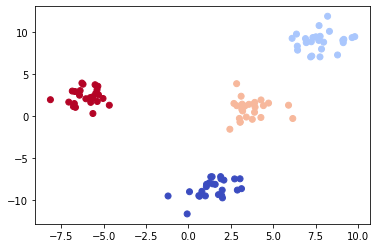

In [4]:
features = data[0]
labels = data[1]
plt.scatter(features[:,0],features[:,1],c=labels, cmap='coolwarm')

### 使用 numpy Generate data

In [5]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))

inputs = np.column_stack((xs,zs))
print(inputs.shape)

(1000, 2)


## 給定一個 Function 

f(x,z) = 2*x - 3*z + 5 + noise

In [6]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


畫出來看

In [7]:
# 記得一定要轉置，否則 plot 會出錯

xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
targets = targets.reshape(observations,)

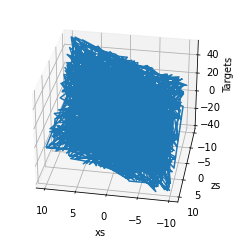

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot(xs,zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()

In [9]:
# 轉回來陣列的形狀

xs = xs.reshape(observations,1)
zs = zs.reshape(observations,1)
targets = targets.reshape(observations,1)

## Define weights and biases

![Initial weights and biases](pictures/144627.png)

In [10]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size =(2,1))
biases = np.random.uniform(-init_range, init_range, size =1)
print('weight = ', weights)
print('biases = ', biases)

weight =  [[-0.07113213]
 [ 0.09991581]]
biases =  [-0.03548996]


## Define a Learning rate

In [11]:
learning_rate = 0.02

## Train the model

![Initial weights and biases](pictures/150250.png)

In [12]:
for i in range(120):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas **2) / 2 / observations
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

239.9302620071516
39.16035597855547
14.943743370356438
11.66713857355036
10.892977144298333
10.431873944610581
10.022684970101055
9.633664814525877
9.260460067353062
8.902019164076387
8.55770852023726
8.226965061621327
7.909253445925434
7.604060104759754
7.310891789344378
7.0292746961181205
6.758753691349342
6.498891574353296
6.249268370756705
6.009480653738738
5.7791408920328315
5.557876823620351
5.345330854101842
5.141159478773315
4.945032727473464
4.756633631304665
4.5756577103659
4.4018124816696345
4.234816986447462
4.074401336080542
3.9203062759209435
3.772282766299048
3.630091580039804
3.4935029158373654
3.3622960268633095
3.236258864008155
3.1151877331796687
2.9988869661040543
2.8871686040980267
2.7798520943006726
2.6767639978741946
2.577737709701926
2.482613189130619
2.391236701321853
2.3034605687945215
2.219142932756904
2.138147523842542
2.0603434418794557
1.9856049443367227
1.9138112431065561
1.8448463092934404
1.778598685694824
1.7149613066703386
1.6538313251083938
1.5951099

## 比較 ML 跟設定值的差異

f(x,z) = 2*x - 3*z + 5 (bias) + noise

weight =  [[ 1.99810764]
 [-2.99927745]]
biases =  [4.53390021]


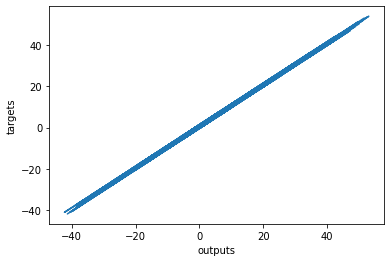

In [13]:
print('weight = ', weights)
print('biases = ', biases)

plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# Tensorflow 上場

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

## 產生測試數據

In [15]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## 使用 Tensorflow 解題

In [16]:
training_data = np.load('TF_intro.npz')

In [17]:
## The first version

input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose = 1)

Epoch 1/100
32/32 [==============================] - 2s 1ms/step - loss: 59.2784
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.2662
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.7497
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7996
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4227
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3748
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3348
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3489
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3500
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3469
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3427
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3335
Epoch 13/100
32/32 [================

In [18]:
## Some improvements - 其實差不多…因為 noise 的大小就在那裏

input_size = 2
output_size = 1

model = tf.keras.Sequential([tf.keras.layers.Dense(output_size,
                         kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                         bias_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1))])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose = 1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 79.6284
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.4490
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.8163
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7367
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4421
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3725
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3210
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3485
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3489
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3479
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3505
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3742
Epoch 13/100
32/32 [================

## 查看結果

f(x,z) = 2*x - 3*z + 5 + noise

weight = [2,-3]

bias = 5

In [19]:
weight = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]

print('weight = ', weight)
print('biases = ', bias)

weight =  [[ 2.0203795]
 [-3.013592 ]]
biases =  [5.0036554]


## 使用此結果做出預測

In [20]:
pred = (model.predict_on_batch(training_data['inputs']))
tar = training_data['targets']
err = pred - tar
display = np.column_stack((pred.round(1), tar, err.round(1)))

In [21]:
display

array([[-26.20000076, -26.6288494 ,   0.5       ],
       [ 32.29999924,  32.38168138,  -0.1       ],
       [ -1.10000002,  -0.22899371,  -0.9       ],
       ...,
       [ 32.09999847,  32.61155112,  -0.6       ],
       [ 41.09999847,  41.51283989,  -0.4       ],
       [ -7.80000019,  -7.16015797,  -0.6       ]])

# 模型 Models

## Combination of Linear and Non-linear is "Layer"

![](pictures/203304.png)

![](pictures/203825.png)

![](pictures/204123.png)

![](pictures/204245.png)

![](pictures/2021-06-12_204834.png)

![](pictures/2021-06-12_205118.png)

![](pictures/2021-06-12_205503.png)

![](pictures/2021-06-12_205649.png)

![](pictures/2021-06-12_205838.png)

## 如果只有 linear relationship, 無法 stack layers

![](pictures/2021-06-12_210345.png)

如果是這樣，那就失去了意義了，因為兩層可以直接算成一層 (如果沒有 non-linear mixture)

![](pictures/2021-06-12_210656.png)

![](pictures/2021-06-12_210819.png)

## Activation Functions (non-linear)

![](pictures/2021-06-12_211058.png)

## Type of Activation Functions

![](pictures/2021-06-12_211536.png)

They are in some ways:
> monotonic, continuous, and differentiable

But softmax is a little bit different - it takes as argument the whole vector (@i位置除以整個線型的 sumary), 而其他 activation function 都是看單點的值

![](pictures/2021-06-12_212537.png)

![](pictures/2021-06-12_212724.png)

![](pictures/2021-06-12_212939.png)

重點是，softmax 的加總為 1，最後會呈現「機率分布」。所以很多分類的 AI 最後一層必須用 softmax

## 反向傳播算法 Backpropagation

![](pictures/2021-06-12_213440.png)

![](pictures/2021-06-12_213915.png)

![](pictures/2021-06-12_213721.png)

![](pictures/2021-06-12_214028.png)

## An Example to describe backpropagation

![](./pictures/2021-06-12_214432.png)

![](./pictures/2021-06-12_214652.png)

# Underfitting and Overfitting

## What is a proper fitting looks like?

![](pictures/2021-06-13_063241.png)

![](pictures/2021-06-13_063414.png)

## Training and Validation loss means something


![](pictures/2021-06-13_064129.png)

開始 overfitting, Training loss 變小，但 validation loss 開始變大 (model 不適用於 validation 的點)

![](pictures/2021-06-13_064403.png)

## 結論，可行做法

分資料，Training dataset 做 backpropagation

![](pictures/2021-06-13_070429.png)

利用 validation 做 inward test，看 loss 的變化(變小是應該的，反向變大時，可能是 overfitting)
看單一的測試不準，我們看每個 epoch 的綜合結果

![](pictures/2021-06-13_070626.png)


最後用 test dataset 來確認 model 的準確程序

![](pictures/2021-06-13_071015.png)

## N-Fold Cross-Validation 當資料量不大的時候

![](pictures/2021-06-13_071752.png)

## Early stopping - before overfit

用兩個主要的參數：updatres too small, and validation loss increases 若都是 True, 就停下來

![](pictures/2021-06-13_72602.png)

## Dropout 一種對抗過擬合的方法：丟棄法 (Dropout)

Dropout 是一種對抗過擬合的正則化方法，在訓練時每一次的迭代 (epoch)皆以一定的機率丟棄隱藏層神經元，而被丟棄的神經元不會傳遞訊息，例如 Fig 1 的每一層以 0.5 的機率丟棄神經元，所以再向前傳播時紅色被打叉的神經元不會傳遞訊息。

此外，在反向傳播時，被丟棄的神經元其梯度是 0，所以在訓練時不會過度依賴某一些神經元，藉此達到對抗過擬合的效果。

但是，如果在訓練時以機率 p 丟棄神經元，而測試時不會丟棄神經元，因此，會造成測試的結果比訓練大 1/(1−p) 倍，所以為了保持輸出的期望值不變，會在測試時將神經元向前傳遞的訊息乘以 1−p。

'''python
keep_prob = tf.placeholder(tf.float32) # probability to keep units

hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)
hidden_layer = tf.nn.dropout(hidden_layer, keep_prob)

logits = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])
'''


# Initialization - how to

要特別注意，當 random.uniform 和 sigmoid 搭配時，可能會喪失 non-linear 的能力

![](pictures/2021-06-13_074351.png)

因為機率的關係，大部份數字座落在中間，而 sigmoid 剛好是 linear 的。而兩個邊界又讓 sigmoid 成為 1 or 0 (無法學習)

![](pictures/2021-06-13_075036.png)

## Xavier initialization (tensorflow default)

- Understanding the difficulty of training deep feedforward neural networks

![](pictures/2021-06-13_080937.png)

- 可以看到 initiation 跟 input 和 output 的數量是有關的，因為 backpropagation

![](pictures/2021-06-13_081136.png)


# Gradient Descent(GD), learning rate

## Stochastic Gradient Descent(SGD)

跟 Gradient Descent 很像，但做到每個 epoch 內的 real time check

SGD 是以 batch 為概念，不是 epoch，就是比較細，比較快(雖然會喪失一些 accuracy，但可以後續處理)

![](pictures/2021-06-13_081936.png)

What if there are bunch of local minimums and not leading to global minimum?

![](pictures/2021-06-13_084557.png)


## Momentum 

![](pictures/2021-06-13_084959.png)

將 Loss 對 w 微分，其實這也是理想的狀態，某些情況也許不適用。alfa 是常用的值。

![](pictures/2021-06-13_085248.png)

## learning rate

Constant learning rate 肯定是不好的。Here is the strategy

![](pictures/2021-06-13_090013.png)

也可以跟 epoch 的數目相關。C 為 constant. 可以設的跟 epoch 接近

![](pictures/2021-06-13_090338.png)

## Adaptive Gradient Algorithm - AdaGrad

![](pictures/2021-06-13_091931.png)

## RMSprop - root mean square propagation

比 Ada 好，會偵測 moving average

![](pictures/2021-06-13_092610.png)

## 目前最強：Adam (Momentum + Learning rate)

把 RMSprop 和 Learning rate 整合，M 為 momentum

![](pictures/2021-06-13_092937.png)

# 資料的前處理

## 不做不行，因為很多 Tool 有其限制

而且每個 input feature 如果在不同的 scale，會發生嚴重的「認知」問題

![](pictures/2021-06-13_093529.png)

## 如果是 exponential 型的資料，那要取 Log 才好

![](pictures/2021-06-13_093915.png)

## 標準化處理數據 Standardization and Feature Scaling

> 用 Sigma 來表現

> 此處理在統計上也是有意義的

![](pictures/2021-06-13_094211.png)

## 其他方法：Normalization, PCA, Whitening, ...

## Buffering - 一次抓取的數據量，避免 memory out of stack

最好，數字是小於 number of samples

## Balancing - 資料的不對稱，會扭曲 model

- 如果讓 Model 分貓和狗。貓的資料佔 90%，狗 10%, 則一個只會產出貓的 model 有 90% 準確率

- 資料的前處理需要把各種「分類」做「分類」，不能偏心太多

# 分類方法 Categorical Data

## 編號不好，隱含了「順序性」

## Binary encoding

![](pictures/2021-06-13_100007.png)

## One-hot encoding (很好，但分類數量大的時候會浪費 memory 的計算量能)

![](pictures/2021-06-13_100329.png)

## Optimizer, Loss Function

optimizer > adam

loss function: 
> binary_crossentropy: 通常用在 binary encoding

> categorical_crossentropy: expects that you've on-hot encoded the targets

> sparse_categorical_crossentropy: applies on-hot encoding

# 多 Model 戰法 - 每個 Model 錯的題目可能不一樣，那就三個投票，用 weighting

![](pictures/2021-06-18_210019.png)

# Callback 訓練過程中的事件

Callback 可以在模型訓練過程中觸發事件，記錄訓練過程產生的資訊、在查核點(Checkpoint)對模型存檔、迫使訓練提早結束...等，除了可以使用內建(built-in)的Callback，也可以自制(customize)Callback。

Callback搭配許多 Keras 內建的函數，可以完全解構模型訓練的過程。
以下我們就來使用一些範例，來說明Callback功能。

內建的Callback
常用的 Callback 包括：

CSVLogger：可將訓練過程記錄至 CSV 檔案。
TensorBoard：這是跟 Tensorflow 結合的有利支援，將訓練過程記錄存成 TensorBoard 檔案格式，直接使用 TensorBoard 工具觀看統計圖。
ModelCheckpoint：由於訓練過程耗時，有可能訓練一半就當掉，因此，我們可以利用這個 Callback，在每一個檢查點(Checkpoint)存檔，下次執行時，就可以從中斷點繼續訓練。
EarlyStopping：可設定訓練提早結束的條件。
LearningRateScheduler：可動態調整學習率(Learning Rate)。
其他還有：

ReduceLROnPlateau：當訓練已無改善時，可以降低學習率，追求更細微的改善，找到更精準的最佳解。
LambdaCallback：直接使用匿名函數自制Callback。
TerminateOnNaN：當損失函數為NaN(Null value)，訓練提早結束。
ProgbarLogger：記錄訓練進度。

# 優化模型參數

pip install keras-tunner

import kerastuner as kt

在寫 model 的時候，埋入一個 可變化的 值

# 儲存 Model 和 Weights

pip install pyyaml, h5py

詳見例子的說明

# The End

# 儲存 Model 和 Weights

pip install pyyaml, h5py